In [4]:
# -*- coding: utf-8 -*-
%matplotlib inline
from requests_html import HTMLSession
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

url = 'http://opendata2.epa.gov.tw/UV/UV.json'
r = requests.get(url)
#利用json.loads()解碼JSON
reqsjson = json.loads(r.text)

#利用迴圈儲存地方紫外線數值
Sitename = {'淡水':0, '板橋':0, '桃園':0, '苗栗':0, '沙鹿':0, '彰化':0, '南投':0, '斗六':0, 
            '塔塔加':0, '朴子':0, '新營':0, '橋頭':0, '屏東':0, '嘉義':0, '臺中':0, '澎湖':0,
            '宜蘭':0, '金門':0, '日月潭':0, '臺東':0, '蘭嶼':0, '新屋':0, '基隆':0, '成功':0, 
            '臺北':0, '恆春':0, '鞍部':0, '新竹':0, '臺南':0, '玉山':0, '高雄':0, '馬祖':0, '花蓮':0}
County = []
PublishAgency = []
PublishTime = []
Latitude = []
Longitude = []
for content in reqsjson:
    if (content['UVI']==''):
        pass
    else:
        Sitename[content['SiteName']]+= float(content['UVI'])
        County.append(content['County'])
        PublishAgency.append(content['PublishAgency'])
        PublishTime.append(content['PublishTime'])
        Latitude.append(content['WGS84Lat'])
        Longitude.append(content['WGS84Lon'])
    
Site = ['Tamsui', 'Banqiao', 'Taoyuan', 'Miaoli', 'Shalu', 'Changhua', 'Nantou', 'Douliu',
         'Tatajia', 'Puzi', 'Xinying', 'Qiaotou', 'Pingtung', 'Chiayi', 'Taizhong', 'Penghu',
         'Yilan', 'Kinmen', 'Sun Moon Lake', 'Taitung', 'Lanyu', 'Xinwu', 'Keelung', 'Chenggung',
         'Taipei', 'Hengchun', 'Anbu', 'Hsinchu', 'Tainan', 'Mt. Jade', 'Kaohsiung', 'Matsu',
         'Hualien']
Uvi=[]
for key in Sitename.items():
    Uvi.append(key[1])

df=pd.DataFrame({'Country' : County,
                 'Publish Agency' : PublishAgency,
                 'Publish Time' : PublishTime,
                 'Site Name' : Site,
                 'UVI' : Uvi,
                 'Latitude' : Latitude,
                 'Longitude' : Longitude})

In [5]:
df
#df.head()

,Country,Publish Agency,Publish Time,Site Name,UVI,Latitude,Longitude
0,新北市,環境保護署,2018-07-28 17:00,Tamsui,2.00,"25,09,52.20","121,26,57.26"
1,新北市,環境保護署,2018-07-28 17:00,Banqiao,1.00,"25,00,46.7","121,27,31.2"
2,桃園市,環境保護署,2018-07-28 17:00,Taoyuan,2.00,"24,59,12.40","121,18,31.40"
3,苗栗縣,環境保護署,2018-07-28 17:00,Miaoli,2.00,"24,33,54.97","120,49,12.72"
4,臺中市,環境保護署,2018-07-28 17:00,Shalu,2.00,"24,13,32.26","120,34,7.66"
5,彰化縣,環境保護署,2018-07-28 17:00,Changhua,2.00,"24,03,57.60","120,32,29.47"
6,南投縣,環境保護署,2018-07-28 17:00,Nantou,2.00,"23,54,46.8","120,41,7.1"
7,雲林縣,環境保護署,2018-07-28 17:00,Douliu,2.00,"23,42,42.67","120,32,41.98"
8,嘉義縣,環境保護署,2018-07-28 17:00,Tatajia,1.00,"23,28,14.19","120,52,50.06"
9,嘉義縣,環境保護署,2018-07-28 17:00,Puzi,2.00,"23,27,55.11","120,14,50.46"


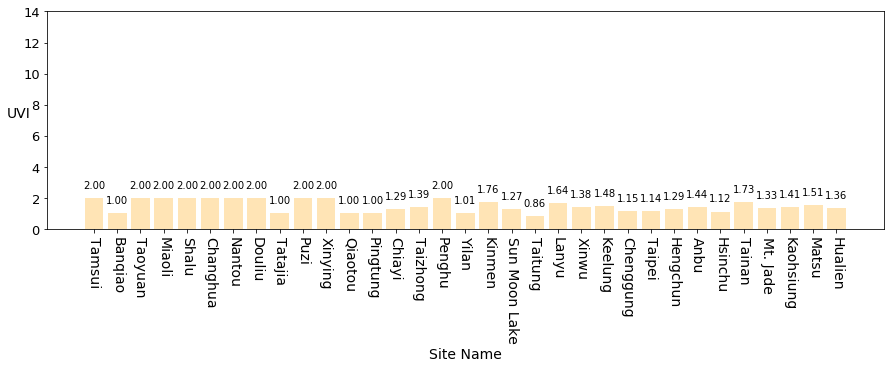

In [6]:
#draw bar chart
plt.figure(figsize=(15,4))
plt.bar( Site , Uvi , color='moccasin' )

plt.xticks(fontsize=14, rotation=270)
plt.yticks( range(0, 16, 2),fontsize=13)

plt.xlabel('Site Name', fontsize=14)
plt.ylabel('UVI', fontsize=14, rotation=0)

for x,y in zip( Site , Uvi ):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x,y+0.5,'%.2f'%y,ha='center',va='bottom')

In [7]:
import urllib.request
import re
url_2 = 'http://opendata.cwb.gov.tw/govdownload?dataid=O-A0005-001&authorizationkey=rdec-key-123-45678-011121314'
r = urllib.request.urlopen(url_2)
bytes_data = r.read()
text = bytes_data.decode(encoding='utf-8')
pattern = r'<value>(.*?)</value>'
match = re.findall(pattern,text)
print(max(match))

9.7800


<Figure size 360x972 with 0 Axes>

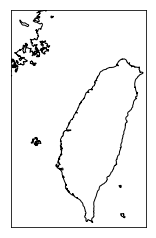

<Figure size 360x972 with 0 Axes>

In [8]:
from mpl_toolkits.basemap import Basemap
import shapefile
m = Basemap()
m = Basemap(projection='merc', resolution='h',llcrnrlon=119.0, llcrnrlat=21.8, urcrnrlon=122.07, urcrnrlat=26.3)

#海岸線的寬度
m.drawcoastlines(linewidth=1)
plt.figure(figsize = (5,13.5))